In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats

In [2]:
baselines = ['baseline_lowest', 'baseline_highest', 'baseline_random', 'baseline_greedy']
baseline_results = {}

# Plots

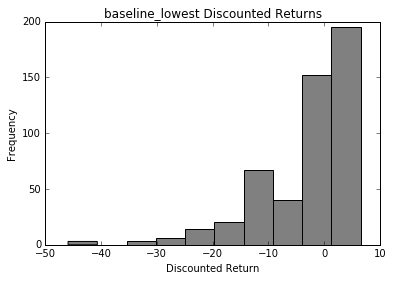

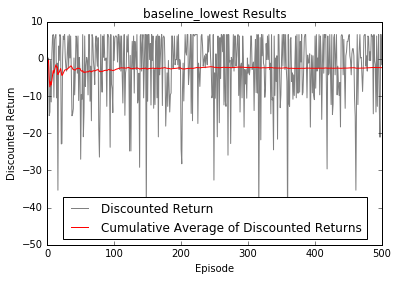

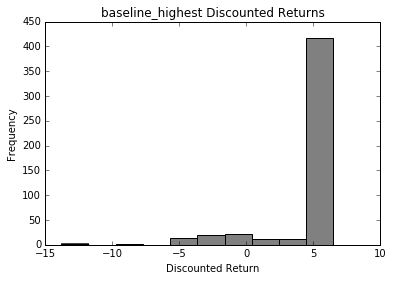

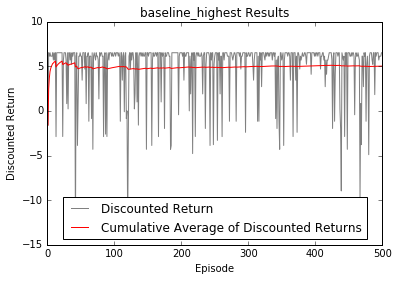

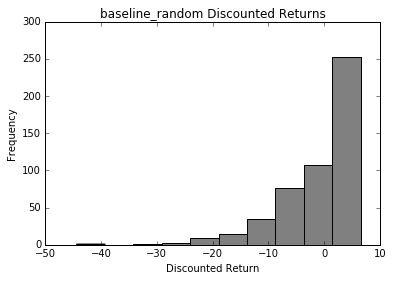

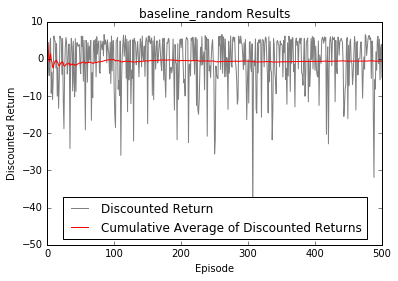

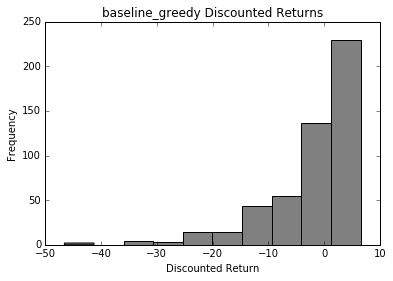

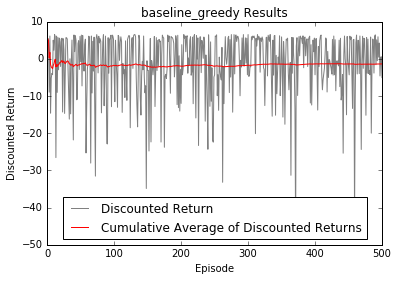

In [3]:
for baseline in baselines:
    data = pd.read_csv(os.path.join(baseline, 'results.txt'))
    baseline_results[baseline] = data
    plt.figure()
    plt.hist(data.discountedReturn, color='gray')
    plt.xlabel('Discounted Return')
    plt.ylabel('Frequency')
    plt.title('{} Discounted Returns'.format(baseline))
    plt.figure()
    plt.plot(data.episode, data.discountedReturn, 'gray', label='Discounted Return')
    plt.plot(data.episode, data.averageDiscountedReturn, 'red', label='Cumulative Average of Discounted Returns')
    plt.legend(loc='lower center')
    plt.xlabel('Episode')
    plt.ylabel('Discounted Return')
    plt.title('{} Results'.format(baseline))

# Averages

In [4]:
episode_length = 500
for baseline in baselines:
    print('Average discounted rewards over {} episodes of {}: {}'.format(episode_length, baseline, baseline_results[baseline].averageDiscountedReturn.iloc[-1]))

Average discounted rewards over 500 episodes of baseline_lowest: -2.36900199242
Average discounted rewards over 500 episodes of baseline_highest: 5.01245993979
Average discounted rewards over 500 episodes of baseline_random: -0.608114578537
Average discounted rewards over 500 episodes of baseline_greedy: -1.38014535008


## Statistical Tests

In [5]:
stats.ttest_ind(baseline_results['baseline_random'].discountedReturn, baseline_results['baseline_greedy'].discountedReturn, equal_var=False)

Ttest_indResult(statistic=1.537258418357688, pvalue=0.12455662241658791)

In [6]:
stats.ttest_ind(baseline_results['baseline_random'].discountedReturn.iloc[:250], baseline_results['baseline_greedy'].discountedReturn.iloc[:250], equal_var=False)

Ttest_indResult(statistic=1.7853652250307195, pvalue=0.0748429136095098)

In [7]:
stats.ttest_ind(baseline_results['baseline_lowest'].discountedReturn, baseline_results['baseline_greedy'].discountedReturn, equal_var=False)

Ttest_indResult(statistic=-1.758505443657636, pvalue=0.07896924807809826)

In [8]:
stats.ttest_ind(baseline_results['baseline_lowest'].discountedReturn, baseline_results['baseline_random'].discountedReturn, equal_var=False)

Ttest_indResult(statistic=-3.37463236975277, pvalue=0.0007691875795623645)